

AUTOSCOUT Project


In [142]:
 # Importing the libraries

!pip install skimpy

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntSlider, Output, widgets
# from IPython.core.display import display
from IPython.display import display
import re

from skimpy import clean_columns, skim
# import requests
# import geopy
# from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 300
pd.options.display.max_columns = 100

# Upload the data
df0 = pd.read_json(r"C:\Users\omerk\Desktop\AUTOSCOUT PROJECT\as24_cars.json")
df = df0.copy()
print(df.head())

# Information about data
print(df.info())
print(df.describe())




               make_model         short_description               make  \
0     Mercedes-Benz A 160                       CDi  \nMercedes-Benz\n   
1   Mercedes-Benz EQE 350                      350+  \nMercedes-Benz\n   
2  Mercedes-Benz A 45 AMG          S 4Matic+ 8G-DCT  \nMercedes-Benz\n   
3  Mercedes-Benz A 35 AMG            4Matic+ 7G-DCT  \nMercedes-Benz\n   
4  Mercedes-Benz A 45 AMG  200CDI BE Line 4M 7G-DCT  \nMercedes-Benz\n   

                model                                           location  \
0     [\n, A 160 ,\n]  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...   
1   [\n, EQE 350 ,\n]       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES   
2  [\n, A 45 AMG ,\n]  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...   
3  [\n, A 35 AMG ,\n]  Carrer de Provença, 31 Local,  8029 BARCELONA, ES   
4  [\n, A 45 AMG ,\n]             CARRIL ARAGONES 4,  30007 CASILLAS, ES   

        price          Body type                      Type        Doors  \
0  € 16,950.-  [\n, Com

In [146]:
df

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [148]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]","[\n, A 35 AMG ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-","€ 46,990.-","€ 16,800.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [150]:
df0.head()

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [152]:
df0.sample(10)

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
12345,SEAT Leon,2.0TDI CR S&S FR DSG7 150,\nSEAT\n,"[\n, Leon ,\n]","ROTONDA DE PITAGORAS, 1, NAVE 602, 28806 ALCA...","€ 17,000.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468152, \n]","[\n, 12 months, \n]","155,000 km",06/2019,[\nAutomatic\n],Diesel,Grey,NaN,"[ , Precio al contado: 17800 euros, , Buen es...",Dealer,"[\n, 5, \n]",[\n110 kW (150 hp)\n],"[\n1,968 cc\n]",[\n7\n],NaN,NaN,"[\n, Front, \n]",[\n4\n],"[[4.3 l/100 km (comb.)], [5 l/100 km (city)], ...","[Cruise control, Electrical side mirrors, Mult...","[Bluetooth, On-board computer]","[ABS, Central door lock, Fog lights, Isofix, P...",[Alloy wheels],"[\n1,372 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5343,Renault Wind,1.6-16V Exception 133PK Cabriolet,\nRenault\n,"[\n, Wind ,\n]","5431KR Cuijk, NL","€ 7,500.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]",NaN,NaN,NaN,"133,000 km",05/2011,[\nManual\n],Gasoline,Black,NaN,[• 1.6/ 133PK: Van deze versie zijn er maar en...,Private seller,"[\n, 2, \n]",[\n98 kW (133 hp)\n],"[\n1,598 cc\n]",NaN,160 g/km (comb.),NaN,NaN,[\n4\n],"[[6.9 l/100 km (comb.)], [9.1 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...","[Bluetooth, CD player, Hands-free equipment, O...","[ABS, Adaptive Cruise Control, Central door lo...","[Alloy wheels, Spare tyre, Spoiler, Sport seats]","[\n1,148 kg\n]",NaN,06/2023,06/2022,Yes,Yes,Euro 5,NaN,Black,Full leather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/2021,NaN,NaN,NaN
20337,Nissan Qashqai,Visia 1.3 DIG-T EU6d-T LED-Tagfahrlicht Multif...,\nNissan\n,"[\n, Qashqai ,\n]","Rudolf-Diesel-Str. 9, 52351 Düren, DE","€ 19,480.-","[\n, Off-Road/Pick-up, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Germany, \n]","[\n, dn1877-21, \n]",NaN,"14,337 km",12/2018,[\nManual\n],Gasoline,Silver,Metallic,"[Getriebe:, Schaltgetriebe, Technik:, Bordco...",Dealer,"[\n, 5, \n]",[\n103 kW (140 hp)\n],"[\n1,332 cc\n]",[\n6\n],121 g/km (comb.),Silver (m),"[\n, Front, \n]",[\n4\n],"[[5.3 l/100 km (comb.)], [6.6 l/100 km (city)]...","[Air conditioning, Armrest, Cruise control, El...","[Bluetooth, CD player, Digital radio, Hands-fr...","[ABS, Central door lock, Daytime running light...",[Catalytic Converter],NaN,"[\n, 1329/ALO, \n]",12/2021,NaN,NaN,NaN,Euro 6d-TEMP,NaN,NaN,Cloth,2018.00,"[[14,337 km, 12/2018], 1]",NaN,NaN,A,Calculated on basis of measured CO₂-emissions ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13024,SEAT Leon,ST 2.0 TSI S&S Cupra DSG 300,\nSEAT\n,"[\n, Leon ,\n]","CARRETERA FUENCARRAL A HORTALEZA 89 D, 28050 ...","€ 24,117.-","[\n, Station wagon, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7422507, \n]","[\n, 12 months, \n]","53,936 km",05/2017,[\nAutomatic\n],Gasoline,Black,NaN,"[ , Precio al contado: 26499 euros, , AUTOHER...",Dealer,"[\n, 5, \n]",[\n221 kW (300 hp)\n],"[\n1,984 cc\n]",[\n6\n],NaN,Negro,"[\n, Front, \n]",[\n4\n],"[[6.8 l/100 km (comb.)], [8.5 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...","[Bluetooth, On-board computer]","[ABS, Central door lock, Fog lights, Isofix, P...","[Alloy wheels, Sport suspension]","[\n1,466 kg\n]",NaN,Na

In [154]:
df.shape

(29480, 58)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [160]:
df.select_dtypes(include = ['object']).applymap(type)

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'list'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>
2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'list'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'float'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>
3,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'list'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'float'>,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'fl

In [164]:
# Examination of column names 
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'Body type', 'Type', 'Doors', 'Country version', 'Offer number',
       'Warranty', 'Mileage', 'First registration', 'Gearbox', 'Fuel type',
       'Colour', 'Paint', 'desc', 'seller', 'Seats', 'Power', 'Engine size',
       'Gears', 'CO₂-emissions', 'Manufacturer colour', 'Drivetrain',
       'Cylinders', 'Fuel consumption', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', '\nExtras\n',
       'Empty weight', 'Model code', 'General inspection', 'Last service',
       'Full service history', 'Non-smoker vehicle', 'Emission class',
       'Emissions sticker', 'Upholstery colour', 'Upholstery',
       'Production date', 'Previous owner', 'Other fuel types',
       'Power consumption', 'Energy efficiency class', 'CO₂-efficiency',
       'Fuel consumption (WLTP)', 'CO₂-emissions (WLTP)', 'Available from',
       'Taxi or rental car', 'Availability', 'Last timing b

In [166]:
sorted(df.columns)

['\nComfort & Convenience\n',
 '\nEntertainment & Media\n',
 '\nExtras\n',
 '\nSafety & Security\n',
 'Availability',
 'Available from',
 'Battery Ownership',
 'Body type',
 'CO₂-efficiency',
 'CO₂-emissions',
 'CO₂-emissions (WLTP)',
 'Colour',
 'Country version',
 'Cylinders',
 'Doors',
 'Drivetrain',
 'Electric Range (WLTP)',
 'Emission class',
 'Emissions sticker',
 'Empty weight',
 'Energy efficiency class',
 'Engine size',
 'First registration',
 'Fuel consumption',
 'Fuel consumption (WLTP)',
 'Fuel type',
 'Full service history',
 'Gearbox',
 'Gears',
 'General inspection',
 'Last service',
 'Last timing belt change',
 'Manufacturer colour',
 'Mileage',
 'Model code',
 'Non-smoker vehicle',
 'Offer number',
 'Other fuel types',
 'Paint',
 'Power',
 'Power consumption',
 'Power consumption (WLTP)',
 'Previous owner',
 'Production date',
 'Seats',
 'Taxi or rental car',
 'Type',
 'Upholstery',
 'Upholstery colour',
 'Warranty',
 'desc',
 'location',
 'make',
 'make_model',
 'mode

In [172]:
# Renaming Column Names

from skimpy import clean_columns

df = clean_columns(df)
df.head(3).T


,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
body_type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
country_version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [174]:
df0.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'Body type', 'Type', 'Doors', 'Country version', 'Offer number',
       'Warranty', 'Mileage', 'First registration', 'Gearbox', 'Fuel type',
       'Colour', 'Paint', 'desc', 'seller', 'Seats', 'Power', 'Engine size',
       'Gears', 'CO₂-emissions', 'Manufacturer colour', 'Drivetrain',
       'Cylinders', 'Fuel consumption', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', '\nExtras\n',
       'Empty weight', 'Model code', 'General inspection', 'Last service',
       'Full service history', 'Non-smoker vehicle', 'Emission class',
       'Emissions sticker', 'Upholstery colour', 'Upholstery',
       'Production date', 'Previous owner', 'Other fuel types',
       'Power consumption', 'Energy efficiency class', 'CO₂-efficiency',
       'Fuel consumption (WLTP)', 'CO₂-emissions (WLTP)', 'Available from',
       'Taxi or rental car', 'Availability', 'Last timing b

In [176]:
columns_sorted = sorted(df.columns)
columns_sorted

['availability',
 'available_from',
 'battery_ownership',
 'body_type',
 'co_efficiency',
 'co_emissions',
 'co_emissions_wltp',
 'colour',
 'comfort_&_convenience',
 'country_version',
 'cylinders',
 'desc',
 'doors',
 'drivetrain',
 'electric_range_wltp',
 'emission_class',
 'emissions_sticker',
 'empty_weight',
 'energy_efficiency_class',
 'engine_size',
 'entertainment_&_media',
 'extras',
 'first_registration',
 'fuel_consumption',
 'fuel_consumption_wltp',
 'fuel_type',
 'full_service_history',
 'gearbox',
 'gears',
 'general_inspection',
 'last_service',
 'last_timing_belt_change',
 'location',
 'make',
 'make_model',
 'manufacturer_colour',
 'mileage',
 'model',
 'model_code',
 'non_smoker_vehicle',
 'offer_number',
 'other_fuel_types',
 'paint',
 'power',
 'power_consumption',
 'power_consumption_wltp',
 'previous_owner',
 'price',
 'production_date',
 'safety_&_security',
 'seats',
 'seller',
 'short_description',
 'taxi_or_rental_car',
 'type',
 'upholstery',
 'upholstery_co

In [178]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 29480  │ │ string      │ 32    │                                                          │
│ │ Number of columns │ 33     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA      ┃ NA %    ┃ mean  ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ production_date     │   23572 │   79.96 │  2018 │   6.493 │  1954 │  2018 │  2019 │  2021 │  2022 │      ▇ │  │
│ └─────────────────────┴─────────┴─────────┴───────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %       ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make_model                         │        850 │       2.88 │                    2.1 │              61645 │  │
│ │ short_description                  │        850 │       2.88 │                    5.1 │             150035 │  │
│ │ make                               │        850 │       2.88 │                   0.97 │              28630 │  │
│ │ location                           │        850 │       2.88 │                    7.3 │             214201 │  │
│ │ price                              │        850 │       2.88 │                    1.9 │              57260 │  │
│ │ mileage                            │        851 │       2.89 │                    1.9 │              57258 │  │
│ │ first_registration                 │        852 │       2.89 │                   0.97 │              28628 │  │
│ │ fuel_type                          │       2637 │       8.95 │                    1.6 │              47219 │  │
│ │ colour                             │       2574 │       8.73 │                   0.91 │              26906 │  │
│ │ paint                              │      14985 │      50.83 │                   0.49 │              14495 │  │
│ │ seller                             │        850 │       2.88 │                      1 │              30942 │  │
│ │ co_emissions                       │      10886 │      36.93 │                    1.9 │              55800 │  │
│ │ manufacturer_colour                │       7693 │       26.1 │                    1.4 │              40514 │  │
│ │ general_inspection                 │      17226 │      58.43 │                   0.42 │              12254 │  │
│ │ last_service                       │      27477 │      93.21 │                  0.068 │               2003 │  │
│ │ full_service_history               │      16915 │      57.38 │                   0.43 │              12565 │  │
│ │ non_smoker_vehicle                 │      17886 │   

In [184]:
 # examination of missing values
df.isnull().sum()

make_model                   850
short_description            850
make                         850
model                        850
location                     850
price                        850
body_type                    850
type                         850
doors                       1209
country_version            12591
offer_number                6380
warranty                   13696
mileage                      851
first_registration           852
gearbox                     1098
fuel_type                   2637
colour                      2574
paint                      14985
desc                        1433
seller                       850
seats                       3975
power                       1422
engine_size                 2253
gears                      10526
co_emissions               10886
manufacturer_colour         7693
drivetrain                 12587
cylinders                  10628
fuel_consumption            6095
comfort_&_convenience       4047
entertainm

In [188]:
df.isnull().sum()*100 / df.shape[0]

make_model                 2.88
short_description          2.88
make                       2.88
model                      2.88
location                   2.88
price                      2.88
body_type                  2.88
type                       2.88
doors                      4.10
country_version           42.71
offer_number              21.64
warranty                  46.46
mileage                    2.89
first_registration         2.89
gearbox                    3.72
fuel_type                  8.95
colour                     8.73
paint                     50.83
desc                       4.86
seller                     2.88
seats                     13.48
power                      4.82
engine_size                7.64
gears                     35.71
co_emissions              36.93
manufacturer_colour       26.10
drivetrain                42.70
cylinders                 36.05
fuel_consumption          20.68
comfort_&_convenience     13.73
entertainment_&_media     19.80
safety_&

In [200]:
# Dropping columns which have missing values more than %70

def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

df_nans(df, 70)

model_code                71.62
last_service              93.21
production_date           79.96
other_fuel_types          92.15
power_consumption         98.25
energy_efficiency_class   73.53
co_efficiency             73.53
fuel_consumption_wltp     99.66
co_emissions_wltp         99.61
available_from            98.67
taxi_or_rental_car        98.57
availability              98.98
last_timing_belt_change   98.06
electric_range_wltp       99.95
power_consumption_wltp    99.95
battery_ownership         99.98
dtype: float64

In [202]:
drop_columns = df_nans(df, 70).index
drop_columns

Index(['model_code', 'last_service', 'production_date', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership'],
      dtype='object')

In [204]:
df.shape

(29480, 58)

In [206]:
df.drop(drop_columns, axis=1, inplace = True)

In [208]:
df.shape

(29480, 42)

In [218]:
# Dropping redundant columns

df.drop(columns = ['make_model', 'offer_number', 'seller', 'previous_owner', 'non_smoker_vehicle', 'empty_weight', 'emission_class', 'emissions_sticker', 'location', 'country_version','short_description'], inplace = True)

In [220]:
df.shape

(29480, 31)

In [244]:
df.columns

Index(['make', 'model', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_&_convenience', 'entertainment_&_media',
       'safety_&_security', 'extras', 'general_inspection',
       'full_service_history', 'upholstery_colour', 'upholstery'],
      dtype='object')

In [228]:
# Dropping duplicates

duplicates = df[df.duplicated()]


TypeError: unhashable type: 'list'

In [252]:
df[df['make'].duplicated(keep=False)]['make'].value_counts(dropna=True)


make
\nVolvo\n            3659
\nMercedes-Benz\n    2398
\nOpel\n             2385
\nPeugeot\n          2360
\nRenault\n          2351
\nFiat\n             2338
\nFord\n             2324
\nNissan\n           2064
\nToyota\n           2038
\nHyundai\n          1867
\nSEAT\n             1743
\nSkoda\n            1566
\nDacia\n            1537
Name: count, dtype: int64

In [254]:
df[df.astype(str)['make'] == 'Volvo']

,make,model,price,body_type,type,doors,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,general_inspection,full_service_history,upholstery_colour,upholstery


In [256]:
df[df['make'] == 'Volvo'].astype(str).duplicated(keep=False)

Series([], dtype: bool)

In [258]:
df[df['make'] == 'Volvo'].astype(str).duplicated(keep=False).value_counts(dropna=False)

Series([], Name: count, dtype: int64)

In [264]:
# Cleaning the columns one by one 

def first_looking(df, col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))


In [266]:
first_looking(df, "price")

column name    :  price
--------------------------------
per_of_nulls   :  % 2.88
num_of_nulls   :  850
num_of_uniques :  5022
shape_of_df    :  (29480, 31)
--------------------------------
price
NaN           850
€ 14,990.-    222
€ 12,990.-    219
€ 16,990.-    186
€ 19,990.-    166
             ... 
€ 19,112.-      1
€ 30,465.-      1
€ 18,461.-      1
€ 22,649.-      1
€ 4,440.-       1
Name: count, Length: 5022, dtype: int64


In [268]:
df["price"].isnull().any()

True

In [270]:
display(df[df["price"].isnull()].sample(20))

price_nans = df["price"].isnull().sum()

print(f"Price feature/column has {price_nans} NaN values.")

,make,model,price,body_type,type,doors,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,general_inspection,full_service_history,upholstery_colour,upholstery
11025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Price feature/column has 850 NaN values.


In [272]:
df['price']

0        € 16,950.-
1        € 80,900.-
2        € 69,900.-
3        € 46,990.-
4        € 16,800.-
            ...    
29475     € 5,499.-
29476     € 7,300.-
29477    € 29,900.-
29478     € 4,440.-
29479           NaN
Name: price, Length: 29480, dtype: object

In [274]:
df['price'].astype(str).str.extract('(\d+.\d+)')

,0
0,"16,950"
1,"80,900"
2,"69,900"
3,"46,990"
4,"16,800"
...,...
29475,"5,499"
29476,"7,300"
29477,"29,900"
29478,"4,440"


In [280]:
df['price'] = df['price'].astype(str).str.extract('(\d+.\d+)')
df['price'] = df['price'].str.replace(",", "").astype(float)
df['price'] 

0       16950.00
1       80900.00
2       69900.00
3       46990.00
4       16800.00
          ...   
29475    5499.00
29476    7300.00
29477   29900.00
29478    4440.00
29479        NaN
Name: price, Length: 29480, dtype: float64

In [282]:
df.price[3]

46990.0

In [284]:
display(df.price.isnull().sum())
display(df.shape)

850

(29480, 31)

In [286]:
df.dropna(how='all', inplace=True)

In [290]:
display(df.price.isnull().sum())
display(df.shape)


0

(28630, 31)

In [292]:
df['price'].describe()

count    28630.00
mean     23470.66
std      23953.50
min        490.00
25%      11990.00
50%      17979.00
75%      27990.00
max     999999.00
Name: price, dtype: float64

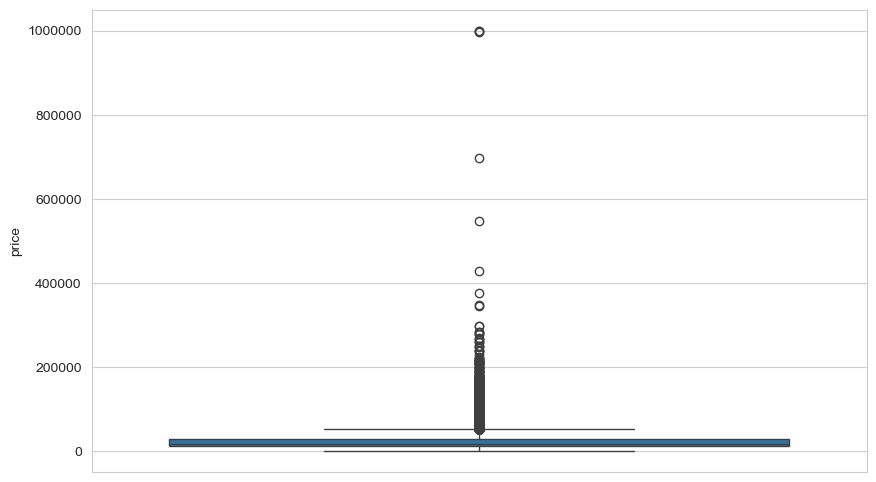

In [294]:
# create box plot
sns.boxplot(df.price)

# format tick labels
plt.ticklabel_format(style='plain', axis='y')  

# display plot
plt.show()

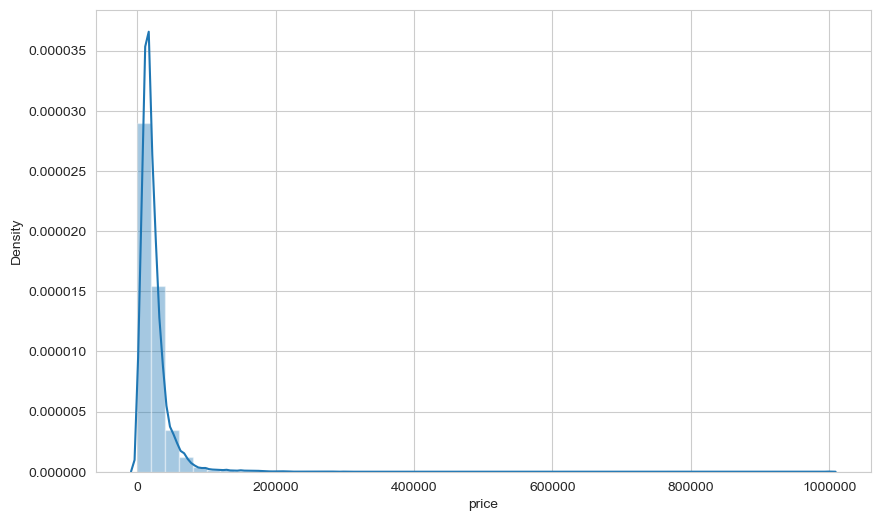

In [296]:
sns.distplot(df.price)
plt.ticklabel_format(style='plain'); 

# fig, ax = plt.subplots(figsize=(15, 6))
# ax.hist(df.price, bins=50);
# df.price.hist(bins=100)

In [300]:
first_looking(df, "make")

column name    :  make
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
shape_of_df    :  (28630, 31)
--------------------------------
make
\nVolvo\n            3659
\nMercedes-Benz\n    2398
\nOpel\n             2385
\nPeugeot\n          2360
\nRenault\n          2351
\nFiat\n             2338
\nFord\n             2324
\nNissan\n           2064
\nToyota\n           2038
\nHyundai\n          1867
\nSEAT\n             1743
\nSkoda\n            1566
\nDacia\n            1537
Name: count, dtype: int64


In [302]:
df["make"] = df.make.str.strip('\n')


In [304]:
df.make.value_counts(dropna=False)

make
Volvo            3659
Mercedes-Benz    2398
Opel             2385
Peugeot          2360
Renault          2351
Fiat             2338
Ford             2324
Nissan           2064
Toyota           2038
Hyundai          1867
SEAT             1743
Skoda            1566
Dacia            1537
Name: count, dtype: int64

In [306]:
first_looking(df,"model")


column name    :  model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  594
shape_of_df    :  (28630, 31)
--------------------------------
model
[\n, Megane ,\n]        863
[\n, Leon ,\n]          787
[\n, V40 ,\n]           740
[\n, Sandero ,\n]       730
[\n, i30 ,\n]           706
                       ... 
[\n, GLA 35 AMG ,\n]      1
[\n, G 55 AMG ,\n]        1
[\n, Ariya ,\n]           1
[\n, 105 ,\n]             1
[\n, 244 ,\n]             1
Name: count, Length: 594, dtype: int64


In [314]:
df["model"][3]

'A 35 AMG'

In [310]:
df['model'] = df['model'].explode().str.strip("\n, ")
df['model']

0           A 160
1         EQE 350
2        A 45 AMG
3        A 35 AMG
4        A 45 AMG
           ...   
29474         S90
29475         S40
29476         C30
29477         S90
29478         S80
Name: model, Length: 28630, dtype: object

In [316]:
df.model.value_counts(dropna=False)

model
Megane        863
Leon          787
V40           740
Sandero       730
i30           706
             ... 
GLA 35 AMG      1
G 55 AMG        1
Ariya           1
105             1
244             1
Name: count, Length: 594, dtype: int64

In [318]:
df[['make', 'model']].sample(20)

,make,model
4717,Opel,Astra
23437,Ford,Focus
10647,Fiat,Barchetta
16832,Dacia,Sandero
28389,Volvo,V60
22380,Ford,Mustang
29434,Volvo,V40
25204,Hyundai,
9717,Fiat,500 Abarth
14074,Skoda,Rapid/Spaceback


In [320]:
df.model.isnull().sum()

0

In [322]:
df['model'].str.contains(r'^\s*$').value_counts()

model
False    28354
True       276
Name: count, dtype: int64

In [324]:
display((df[df['model'].str.contains(r'^\s*$')][ "model"]).count())

df[df['model'].str.contains(r'^\s*$')][["make", "model"]]

276

,make,model
162,Mercedes-Benz,
184,Mercedes-Benz,
186,Mercedes-Benz,
211,Mercedes-Benz,
213,Mercedes-Benz,
226,Mercedes-Benz,
319,Mercedes-Benz,
427,Mercedes-Benz,
442,Mercedes-Benz,
471,Mercedes-Benz,


In [326]:
df["desc"]

0        [ , Precio al contado: 16950 euros,  ,  , Vehí...
1        [ , Precio al contado: 88900 euros,  , AUTO OJ...
2        [Gris MANUFAKTUR mountaingrau magno,  , Linea/...
3        [ , Precio al contado: 48990 euros,  ,  , BONI...
4        [ , Precio al contado: 17400 euros,  , Vehícul...
                               ...                        
29474    [ , Precio al contado: 41400 euros,  , Os pres...
29475    [Een goed rijdende auto met APK + NAP + Elektr...
29476    [*** VOLVO C30 2011 TRES PROPRE EN PARFAIT ETA...
29477    [Bekijk deze auto in unieke 360 graden present...
29478    [YOUNGTIMER !, Bedrijfsinformatie, NEEM VOOR U...
Name: desc, Length: 28630, dtype: object

In [328]:
first_looking(df, "desc")

column name    :  desc
--------------------------------
per_of_nulls   :  % 2.04
num_of_nulls   :  583
num_of_uniques :  23242
shape_of_df    :  (28630, 31)
--------------------------------
desc
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [332]:
df.shape

(28630, 31)

In [336]:
df.drop('desc', axis=1, inplace=True)

In [338]:
df.shape

(28630, 30)

In [340]:
first_looking(df, 'body_type')

column name    :  body_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
shape_of_df    :  (28630, 30)
--------------------------------
body_type
[\n, Station wagon, \n]       5448
[\n, Off-Road/Pick-up, \n]    5415
[\n, Compact, \n]             5387
[\n, Sedan, \n]               5043
[\n, Coupe, \n]               4009
[\n, Convertible, \n]         3328
Name: count, dtype: int64


In [342]:
df['body_type'] = df['body_type'].explode().str.strip("\n, ")
df['body_type']

0        Compact
1        Compact
2        Compact
3        Compact
4        Compact
          ...   
29474      Sedan
29475      Sedan
29476      Sedan
29477      Sedan
29478      Sedan
Name: body_type, Length: 28630, dtype: object

In [344]:
df["body_type"].value_counts(dropna=False)

body_type
Station wagon       5448
Off-Road/Pick-up    5415
Compact             5387
Sedan               5043
Coupe               4009
Convertible         3328
Name: count, dtype: int64

In [346]:
first_looking(df, 'type')

column name    :  type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
shape_of_df    :  (28630, 30)
--------------------------------
type
[\n, Used, \n]              25251
[\n, Demonstration, \n]      1433
[\n, Pre-registered, \n]     1377
[\n, Employee's car, \n]      569
Name: count, dtype: int64


In [348]:
df['type'] = df['type'].explode().str.strip("\n, ")
df['type']

0                  Used
1        Pre-registered
2                  Used
3                  Used
4                  Used
              ...      
29474              Used
29475              Used
29476              Used
29477              Used
29478              Used
Name: type, Length: 28630, dtype: object

In [350]:
df.type.value_counts(dropna=False)

type
Used              25251
Demonstration      1433
Pre-registered     1377
Employee's car      569
Name: count, dtype: int64

In [352]:
first_looking(df, "doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 1.25
num_of_nulls   :  359
num_of_uniques :  7
shape_of_df    :  (28630, 30)
--------------------------------
doors
[\n, 5, \n]    17481
[\n, 2, \n]     5523
[\n, 4, \n]     3001
[\n, 3, \n]     2259
NaN              359
[\n, 6, \n]        5
[\n, 1, \n]        2
Name: count, dtype: int64


In [354]:
df['doors'].explode().str.strip("\n, ")

0        5
1        4
2        5
3        5
4        5
        ..
29474    4
29475    4
29476    3
29477    4
29478    4
Name: doors, Length: 28630, dtype: object

In [356]:
df['doors'] = df['doors'].explode().str.strip("\n, ")
df['doors'] = pd.to_numeric(df['doors'])
df['doors']

0       5.00
1       4.00
2       5.00
3       5.00
4       5.00
        ... 
29474   4.00
29475   4.00
29476   3.00
29477   4.00
29478   4.00
Name: doors, Length: 28630, dtype: float64

In [358]:
df.doors.value_counts(dropna=False)


doors
5.00    17481
2.00     5523
4.00     3001
3.00     2259
NaN       359
6.00        5
1.00        2
Name: count, dtype: int64

In [360]:
first_looking(df, "warranty")

column name    :  warranty
--------------------------------
per_of_nulls   :  % 44.87
num_of_nulls   :  12846
num_of_uniques :  66
shape_of_df    :  (28630, 30)
--------------------------------
warranty
NaN                     12846
[\n, 12 months, \n]      9545
[\n, Yes, \n]            2319
[\n, 24 months, \n]      1515
[\n, 60 months, \n]       968
[\n, 6 months, \n]        398
[\n, 36 months, \n]       257
[\n, 3 months, \n]        185
[\n, 0 months, \n]        133
[\n, 48 months, \n]        78
[\n, 84 months, \n]        47
[\n, 72 months, \n]        40
[\n, 13 months, \n]        22
[\n, 8 months, \n]         19
[\n, 18 months, \n]        15
[\n, 1 months, \n]         15
[\n, 15 months, \n]        13
[\n, 14 months, \n]        13
[\n, 16 months, \n]        13
[\n, 30 months, \n]        12
[\n, 34 months, \n]        11
[\n, 21 months, \n]        11
[\n, 33 months, \n]        11
[\n, 32 months, \n]         9
[\n, 20 months, \n]         9
[\n, 23 months, \n]         9
[\n, 19 months, \

In [362]:
df["warranty"] = df.warranty.apply(lambda x : x[0] if type(x)==list else x)

df["warranty"] = df.warranty.str.extract('(\d{1,4})').astype("float") # str.extract('(\d+)')
df["warranty"]

0       24.00
1       24.00
2       12.00
3       12.00
4       12.00
         ... 
29474   12.00
29475     NaN
29476   13.00
29477   12.00
29478     NaN
Name: warranty, Length: 28630, dtype: float64

In [364]:
df.warranty.value_counts(dropna=False)

warranty
NaN       15165
12.00      9545
24.00      1515
60.00       968
6.00        398
36.00       257
3.00        185
0.00        133
48.00        78
84.00        47
72.00        40
13.00        22
8.00         19
18.00        15
1.00         15
15.00        13
14.00        13
16.00        13
30.00        12
34.00        11
21.00        11
33.00        11
32.00         9
20.00         9
23.00         9
19.00         9
17.00         9
35.00         8
28.00         8
50.00         6
22.00         6
42.00         5
31.00         4
26.00         4
52.00         4
47.00         4
9.00          4
25.00         3
58.00         3
11.00         3
27.00         3
45.00         2
53.00         2
10.00         2
57.00         2
51.00         2
29.00         2
2.00          2
80.00         2
90.00         2
7.00          2
46.00         1
117.00        1
43.00         1
65.00         1
39.00         1
142.00        1
110.00        1
37.00         1
49.00         1
55.00         1
99.00         1

In [366]:
first_looking(df, "mileage")

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14184
shape_of_df    :  (28630, 30)
--------------------------------
mileage
10 km         586
1 km          172
50 km         133
100 km        119
5,000 km      118
             ... 
141,589 km      1
59,821 km       1
123,500 km      1
29,781 km       1
230,047 km      1
Name: count, Length: 14184, dtype: int64


In [368]:
df["mileage"] = df.mileage.str.replace(',', '').str.extract('(\d{1,8})').astype('float')
df["mileage"]

0       120200.00
1         5000.00
2        18900.00
3        18995.00
4       197000.00
           ...   
29474    40345.00
29475   145000.00
29476    96000.00
29477    94343.00
29478   230047.00
Name: mileage, Length: 28630, dtype: float64

In [370]:
df.mileage.value_counts(dropna=False)

mileage
10.00        586
1.00         172
50.00        133
100.00       119
5000.00      118
            ... 
141589.00      1
59821.00       1
123500.00      1
29781.00       1
230047.00      1
Name: count, Length: 14184, dtype: int64

In [372]:
first_looking(df, "first_registration")

column name    :  first_registration
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  656
shape_of_df    :  (28630, 30)
--------------------------------
first_registration
08/2022    454
06/2022    428
05/2019    420
06/2019    418
07/2019    416
          ... 
06/1967      1
06/1980      1
09/1970      1
06/1963      1
10/1979      1
Name: count, Length: 656, dtype: int64


In [374]:
df['first_registration'].str.extract('.*(\d{4})', expand=False)

0        2016
1        2022
2        2020
3        2020
4        2015
         ... 
29474    2019
29475    2004
29476    2011
29477    2017
29478    2002
Name: first_registration, Length: 28630, dtype: object

In [376]:
df['first_registration'].str[-4:]

0        2016
1        2022
2        2020
3        2020
4        2015
         ... 
29474    2019
29475    2004
29476    2011
29477    2017
29478    2002
Name: first_registration, Length: 28630, dtype: object

In [378]:
df['first_registration'] = df['first_registration'].str[-4:].astype('float')
df['first_registration']

0       2016.00
1       2022.00
2       2020.00
3       2020.00
4       2015.00
          ...  
29474   2019.00
29475   2004.00
29476   2011.00
29477   2017.00
29478   2002.00
Name: first_registration, Length: 28630, dtype: float64

In [380]:
df["first_registration"].value_counts(dropna=False)

first_registration
2019.00    3667
2018.00    3492
2022.00    3086
2021.00    2870
2020.00    2473
2017.00    2426
2016.00    1486
2015.00    1237
2014.00     936
2013.00     703
2012.00     655
2011.00     642
2010.00     559
2007.00     492
2008.00     441
2009.00     424
2006.00     395
2005.00     287
2004.00     247
2003.00     211
2001.00     191
2002.00     187
2000.00     160
1999.00     144
1998.00      91
1997.00      81
1994.00      80
1995.00      78
1996.00      71
1991.00      62
1992.00      60
1993.00      55
1990.00      54
1966.00      41
1967.00      34
1988.00      33
1965.00      32
1973.00      29
1972.00      29
1968.00      27
1987.00      26
1978.00      23
1986.00      22
1989.00      20
1970.00      19
1971.00      18
1985.00      18
1969.00      17
1979.00      17
1983.00      16
1975.00      14
1977.00      13
1964.00      11
1976.00      11
1982.00      11
1984.00      10
1981.00       9
1963.00       9
1974.00       9
1962.00       8
1961.00       7
1980.

In [384]:
first_looking(df, 'first_registration')

column name    :  first_registration
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  84
shape_of_df    :  (28630, 30)
--------------------------------
first_registration
2019.00    3667
2018.00    3492
2022.00    3086
2021.00    2870
2020.00    2473
2017.00    2426
2016.00    1486
2015.00    1237
2014.00     936
2013.00     703
2012.00     655
2011.00     642
2010.00     559
2007.00     492
2008.00     441
2009.00     424
2006.00     395
2005.00     287
2004.00     247
2003.00     211
2001.00     191
2002.00     187
2000.00     160
1999.00     144
1998.00      91
1997.00      81
1994.00      80
1995.00      78
1996.00      71
1991.00      62
1992.00      60
1993.00      55
1990.00      54
1966.00      41
1967.00      34
1988.00      33
1965.00      32
1973.00      29
1972.00      29
1968.00      27
1987.00      26
1978.00      23
1986.00      22
1989.00      20
1970.00      19
1971.00      18
1985.00      18
1969.00      17
1979.00      1

In [394]:
df['first_registration'] = df['first_registration'].str[-4:].astype('float')
df['first_registration']

AttributeError: Can only use .str accessor with string values!

In [396]:
first_looking(df,"gearbox")

column name    :  gearbox
--------------------------------
per_of_nulls   :  % 0.87
num_of_nulls   :  248
num_of_uniques :  4
shape_of_df    :  (28630, 30)
--------------------------------
gearbox
[\nManual\n]            17023
[\nAutomatic\n]         11287
NaN                       248
[\nSemi-automatic\n]       72
Name: count, dtype: int64


In [404]:
df['gearbox'] = df['gearbox'].astype(str).str.strip("['\\n']").str.extract("(\D+)")
df['gearbox']

0           Manual
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
29474    Automatic
29475    Automatic
29476       Manual
29477    Automatic
29478    Automatic
Name: gearbox, Length: 28630, dtype: object

In [406]:
df.gearbox.value_counts(dropna=False)

gearbox
Manual            17023
Automatic         11287
a                   248
Semi-automatic       72
Name: count, dtype: int64

In [408]:
df['gearbox'].replace('a', np.nan, inplace=True)

In [410]:
df.gearbox.value_counts(dropna=False)

gearbox
Manual            17023
Automatic         11287
NaN                 248
Semi-automatic       72
Name: count, dtype: int64

In [ ]:

df.to_csv('Cleaned_autoscout.csv)
